In [1]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [2]:
f = open("hurriyet.txt",'r' ,encoding = 'utf-8')
text = f.read()
t_list = text.split('\n')
corpus = []
for sentence in t_list:
    corpus.append(sentence.split())


In [3]:
corpus[:2]

[['iran',
  'devlet',
  'televizyonu',
  'ülkedeki',
  'eyaletin',
  'sinde',
  'yapılan',
  'reformcuları',
  'protesto',
  'amaçlı',
  'yürüyüşlere',
  'milyonlarca',
  'kişinin',
  'katıldığını',
  'bildirdi'],
 ['gösterilerde',
  'fitnecilere',
  'ölüm',
  'münafıklara',
  'ölüm',
  'abd',
  'ye',
  'ölüm',
  'ingiltere',
  'ye',
  'ölüm',
  'sloganları',
  'atıldı']]

In [5]:
model = Word2Vec(corpus, vector_size=100, window=5, min_count=5, sg=1)
# word vectors will be 100 elements. window = 5 means that we consider at five words on the right and left of the middle word. 
# min_count=5 means that if the word includes in the ccorpus less that 5 times then we will ignore this word
# sg --> Skip-Gram = 1 True. Default is CBOW
# model.save('word2vec.model')
# model = Word2Vec.load('word2vec.model')

In [6]:
model.wv.most_similar('hollanda', topn=10) 

[('avusturya', 0.7976064085960388),
 ('belçika', 0.7874400019645691),
 ('danimarka', 0.7869582772254944),
 ('almanya', 0.7620900273323059),
 ('ispanya', 0.7489811182022095),
 ('kanada', 0.7481654286384583),
 ('letonya', 0.7367437481880188),
 ('finlandiya', 0.7287853956222534),
 ('avustralya', 0.7238103151321411),
 ('lüksemburg', 0.7217612862586975)]

In [7]:
model.save('word2vec.model')
#model = Word2Vec.load('word2vec.model')

In [8]:
def closestwords_tsneplot(model, word):
    word_vectors = np.empty((0,100))
    word_labels = [word]
    
    close_words = model.wv.most_similar(word)
    
    word_vectors = np.append(word_vectors, np.array([model.wv[word]]), axis=0)
    
    for w, _ in close_words:
        word_labels.append(w)
        word_vectors = np.append(word_vectors, np.array([model.wv[w]]), axis=0)
        
    tsne = TSNE(random_state=0)
    Y = tsne.fit_transform(word_vectors)
    
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    plt.scatter(x_coords, y_coords)
    
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(5, -2), textcoords='offset points')
        
    plt.show()
        

C:\Users\ardac\anaconda3\envs\gputest\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ardac\anaconda3\envs\gputest\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


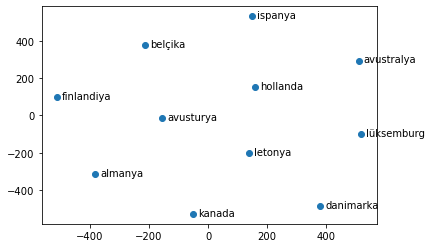

In [9]:
closestwords_tsneplot(model,'hollanda')

C:\Users\ardac\anaconda3\envs\gputest\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\ardac\anaconda3\envs\gputest\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


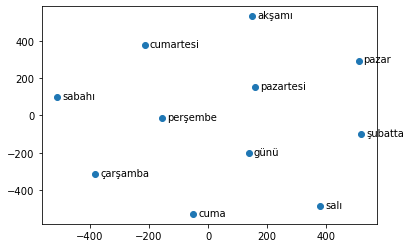

In [10]:
closestwords_tsneplot(model,'pazartesi')